In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
solar_data = pd.read_csv('Solar_energy.csv')
solar_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total solar production,2022.0,"Kilowatt-hours, million",64.00,1.0
1,Afghanistan,Electricity - total solar production,2021.0,"Kilowatt-hours, million",64.00,1.0
2,Afghanistan,Electricity - total solar production,2020.0,"Kilowatt-hours, million",65.93,NaN
3,Afghanistan,Electricity - total solar production,2019.0,"Kilowatt-hours, million",54.77,NaN
4,Afghanistan,Electricity - total solar production,2018.0,"Kilowatt-hours, million",35.00,NaN


# Appendix A1

In [4]:
# Filter the dataset for the last 5 years (2017-2021) and focus on total solar production
solar_data_recent = solar_data[(solar_data["Year"] >= 2017) & (solar_data["Year"] <= 2021)]

# Group by country and sum the quantities for each year to get the total production over the period
total_solar_production_by_country = solar_data_recent.groupby("Country or Area")["Quantity"].sum()

# Sort countries by their total solar energy production in descending order
total_solar_production_sorted = total_solar_production_by_country.sort_values(ascending=False).reset_index()

# Rename the columns for clarity
total_solar_production_sorted.columns = ['Country or Area', 'Total Production']

# Display the top countries with the highest aggregated solar energy production
total_solar_production_sorted.head(10)


,Country or Area,Total Production
0,China,1094932.000
1,United States,524294.443
2,Japan,352298.507
3,India,251761.000
4,Germany,226079.000
5,Italy,120700.943
6,Spain,90009.000
7,Australia,81599.247
8,"Korea, Republic of",70622.470
9,France,62032.274


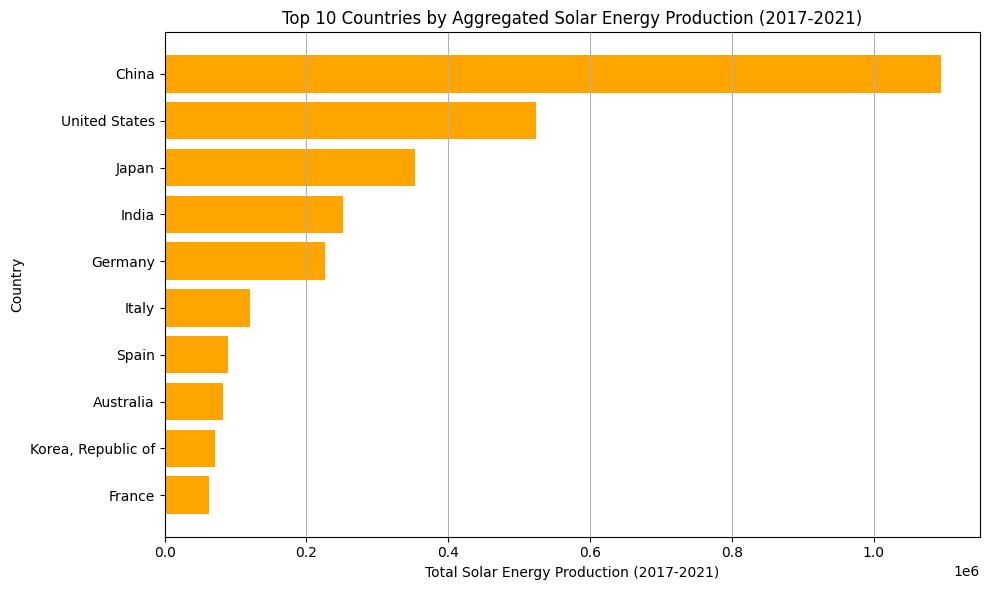

In [7]:
top_countries_solar = total_solar_production_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_countries_solar['Country or Area'][::-1], top_countries_solar['Total Production'][::-1], color='orange')
plt.xlabel('Total Solar Energy Production (2017-2021)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Aggregated Solar Energy Production (2017-2021)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [178]:

# Filter the dataset for the last 5 years (2017-2021)
solar_data_recent = solar_data[(solar_data["Year"] >= 2017) & (solar_data["Year"] <= 2021)]

# Calculate annual production by country
annual_production = solar_data_recent.groupby(["Country or Area", "Year"])["Quantity"].sum().unstack()

# Calculate initial and final production values
initial_production = annual_production[2017]
final_production = annual_production[2021]

# Number of years for the period
n_years = 2021 - 2017

# Calculate CAGR for each country
cagr = ((final_production / initial_production) ** (1 / n_years)) - 1

# Convert CAGR to percentage
cagr_percentage = cagr * 100

# Sort the CAGR values in descending order to find the top 10 countries with the highest CAGR
top_10_cagr = cagr_percentage.sort_values(ascending=False).head(10)

print(top_10_cagr)


Country or Area
Zambia                      448.617365
Argentina                   242.277293
Cambodia                    236.787653
Armenia                     221.681850
Eswatini                    206.937583
Uzbekistan                  189.250761
Colombia                    186.104185
Belize                      181.170663
Bolivia (Plur. State of)    178.588343
Mozambique                  158.950568
dtype: float64


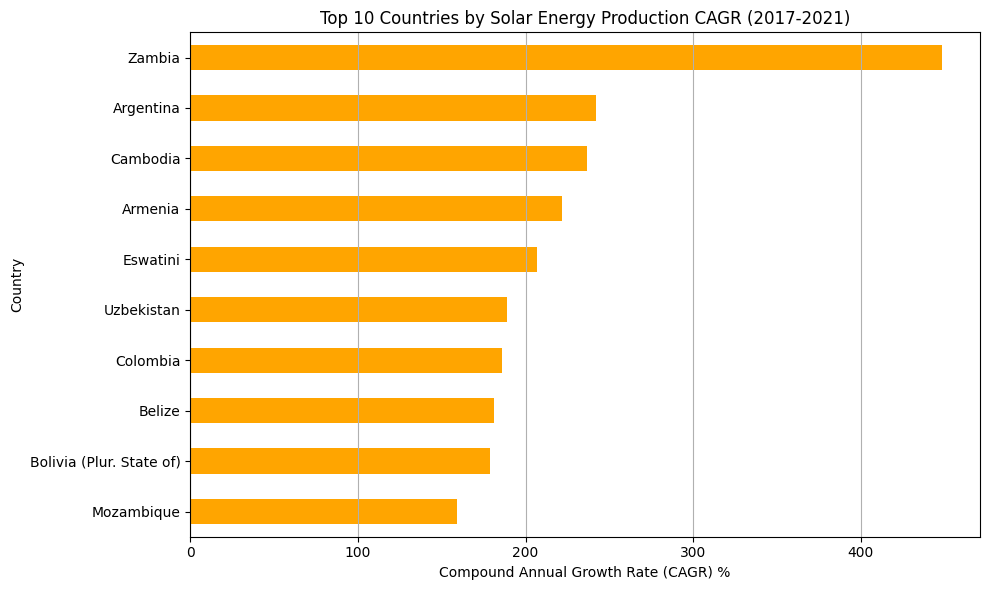

In [179]:
plt.figure(figsize=(10, 6))
top_10_cagr.sort_values().plot(kind='barh', color='orange')
plt.xlabel('Compound Annual Growth Rate (CAGR) %')
plt.ylabel('Country')
plt.title('Top 10 Countries by Solar Energy Production CAGR (2017-2021)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()


In [11]:
wind_data = pd.read_csv('Wind_energy.csv')
wind_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - total wind production,2021.0,"Kilowatt-hours, million",11.0,NaN
1,Algeria,Electricity - total wind production,2020.0,"Kilowatt-hours, million",8.0,NaN
2,Algeria,Electricity - total wind production,2019.0,"Kilowatt-hours, million",10.0,NaN
3,Algeria,Electricity - total wind production,2018.0,"Kilowatt-hours, million",10.0,NaN
4,Algeria,Electricity - total wind production,2017.0,"Kilowatt-hours, million",19.4,NaN


In [180]:
# Filter the wind dataset for the last 5 years (2017-2021)
wind_data_recent = wind_data[(wind_data["Year"] >= 2017) & (wind_data["Year"] <= 2021)]

# Group by country and year, and then calculate the total production for each year
yearly_production_by_country = wind_data_recent.groupby(["Country or Area", "Year"])["Quantity"].sum().unstack()

# Calculate the year-on-year growth for each country
year_on_year_growth = yearly_production_by_country.diff(axis=1)

# Sum the annual growths to get the total growth over the period for each country
total_growth_by_country = year_on_year_growth.sum(axis=1)

# Sort countries by their total growth in wind energy production
total_growth_sorted = total_growth_by_country.sort_values(ascending=False).reset_index()


total_growth_sorted.columns = ['Country or Area', 'Total Growth']


total_growth_sorted.head(10)


,Country or Area,Total Growth
0,China,358870.000
1,United States,125564.925
2,India,38654.000
3,Brazil,29912.975
4,United Kingdom,15020.942
5,Türkiye,13532.935
6,Spain,12934.000
7,Argentina,12326.000
8,France,12221.915
9,Australia,11938.369


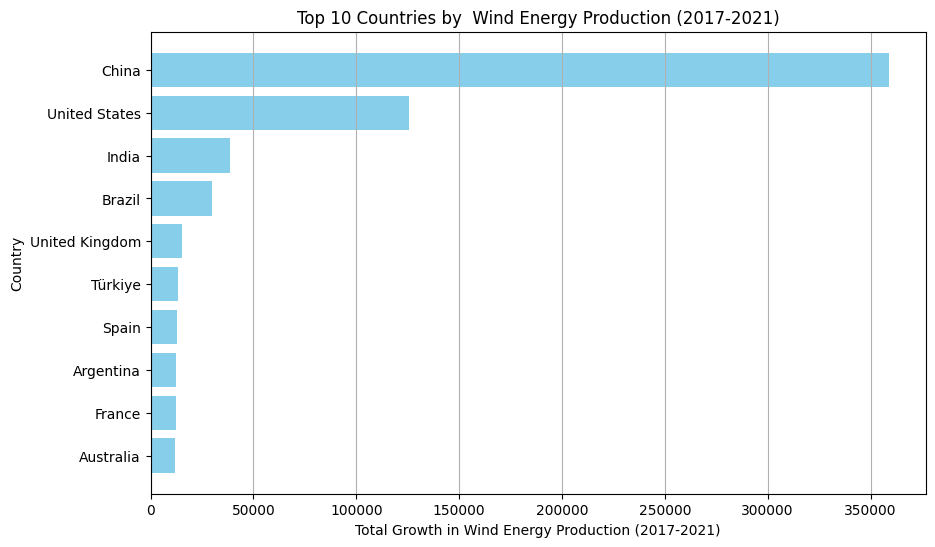

In [21]:
top_countries = total_growth_sorted.head(10)

# Creating a horizontal bar chart to represent the total growth in wind energy production
plt.figure(figsize=(10, 6))
plt.barh(top_countries['Country or Area'], top_countries['Total Growth'], color='skyblue')
plt.xlabel('Total Growth in Wind Energy Production (2017-2021)')
plt.ylabel('Country')
plt.title('Top 10 Countries by  Wind Energy Production (2017-2021)')
plt.gca().invert_yaxis()  # To display the country with the highest growth at the top
plt.grid(axis='x')
plt.show()

In [15]:
# Assuming 'wind_data_recent' and 'yearly_production_by_country' are defined as before

# Calculate initial and final production values for each country
initial_production = yearly_production_by_country[2017]
final_production = yearly_production_by_country[2021]

# Calculate the CAGR for each country
cagr = ((final_production / initial_production) ** (1 / 4)) - 1

# Convert CAGR to percentage
cagr_percentage = cagr * 100

# Sort the CAGR values in descending order and select the top 10 countries
top_10_countries_by_cagr = cagr_percentage.sort_values(ascending=False).head(10)

print(top_10_countries_by_cagr)


Country or Area
Kosovo                337.431262
Saudi Arabia          203.507248
Tonga                 189.905920
Kenya                 138.541568
Russian Federation    120.495331
Serbia                117.506562
Gambia                114.829986
Argentina             114.426734
Colombia              110.644766
Viet Nam               87.624930
dtype: float64


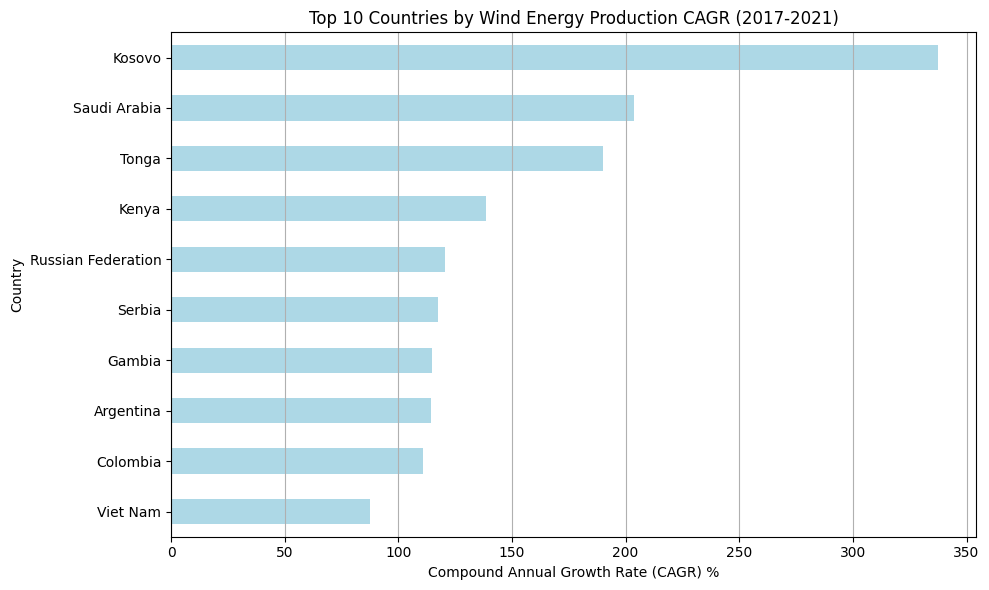

In [17]:
plt.figure(figsize=(10, 6))
top_10_countries_by_cagr.sort_values().plot(kind='barh', color='lightblue')
plt.xlabel('Compound Annual Growth Rate (CAGR) %')
plt.ylabel('Country')
plt.title('Top 10 Countries by Wind Energy Production CAGR (2017-2021)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [22]:
combined_data = pd.concat([wind_data, solar_data])
combined_data_recent = combined_data[(combined_data["Year"] >= 2017) & (combined_data["Year"] <= 2021)]

# Sum up the total renewable energy production (solar + wind) for each country over the last 5 years
total_renewable_by_country = combined_data_recent.groupby("Country or Area")["Quantity"].sum().reset_index()

# Sort countries by their total renewable energy production in descending order to find the top contributors

total_renewable_sorted = total_renewable_by_country.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
# Display the top countries with the highest total renewable energy production
total_renewable_sorted.head(10)

,Country or Area,Quantity
0,China,3286733.000
1,United States,2080210.383
2,Germany,814366.000
3,India,569048.000
4,Japan,392284.773
5,United Kingdom,372022.267
6,Spain,364184.000
7,Brazil,314620.256
8,France,226654.637
9,Italy,216050.187


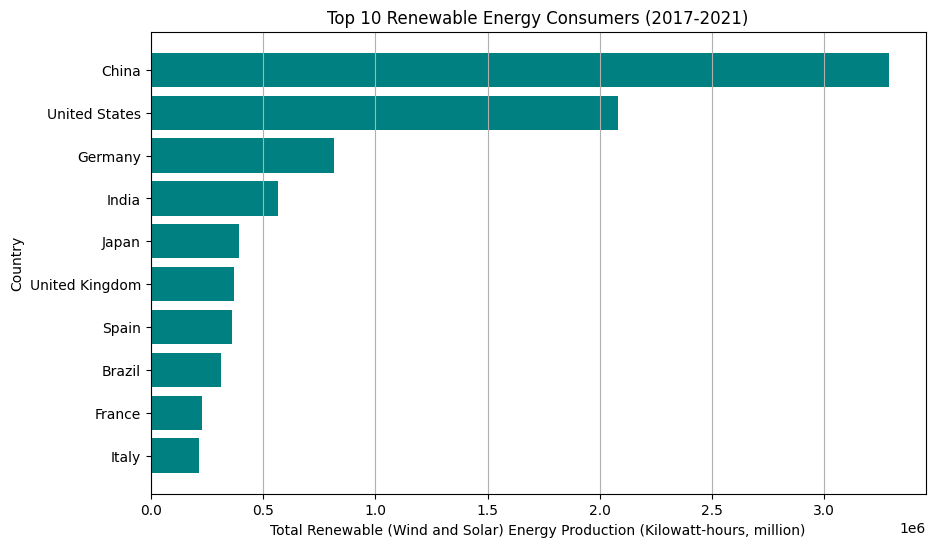

In [24]:
top_10_renewable = total_renewable_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_renewable['Country or Area'], top_10_renewable['Quantity'], color='teal')
plt.xlabel('Total Renewable (Wind and Solar) Energy Production (Kilowatt-hours, million)')
plt.ylabel('Country')
plt.title('Top 10 Renewable Energy Consumers (2017-2021)')
plt.gca().invert_yaxis()  # To display the highest producer at the top
plt.grid(axis='x')
plt.show()

# Appendix B1

In [57]:
import csv
#total_capacity_data = pd.read_csv('total_capacity_full.csv', quoting=csv.QUOTE_NONE)
total_capacity_data = pd.read_csv('total_capacity_full.csv')

total_capacity_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total net installed capacity of ...,2022.0,"Kilowatts, thousand",662.0,1.0
1,Afghanistan,Electricity - total net installed capacity of ...,2021.0,"Kilowatts, thousand",558.0,1.0
2,Afghanistan,Electricity - total net installed capacity of ...,2020.0,"Kilowatts, thousand",550.0,1.0
3,Afghanistan,Electricity - total net installed capacity of ...,2019.0,"Kilowatts, thousand",550.0,1.0
4,Afghanistan,Electricity - total net installed capacity of ...,2018.0,"Kilowatts, thousand",540.7,1.0


In [58]:
# Filter for the most recent year of data available for each country to get a current snapshot
most_recent_year = total_capacity_data.groupby('Country or Area')['Year'].transform(max) == total_capacity_data['Year']
total_capacity_recent = total_capacity_data[most_recent_year]

# Calculate the total installed capacity for each country
total_installed_capacity = total_capacity_recent.groupby('Country or Area')['Quantity'].sum().reset_index(name='Total Installed Capacity')

# Calculate installed capacity from wind and solar for each country
wind_solar_filter = total_capacity_recent['Commodity - Transaction'].str.contains('wind|solar', case=False, regex=True)
wind_solar_capacity = total_capacity_recent[wind_solar_filter].groupby('Country or Area')['Quantity'].sum().reset_index(name='Wind and Solar Capacity')

# Merge the total and wind/solar capacities
merged_data = pd.merge(total_installed_capacity, wind_solar_capacity, on='Country or Area', how='left').fillna(0)

# Calculate the percentage of wind and solar in the total installed capacity
merged_data['Wind and Solar Percentage'] = (merged_data['Wind and Solar Capacity'] / merged_data['Total Installed Capacity']) * 100

# Sort countries by the highest percentage of wind and solar in their energy mix
sorted_data = merged_data.sort_values(by='Wind and Solar Percentage', ascending=False).reset_index(drop=True)

sorted_data.head(10)


,Country or Area,Total Installed Capacity,Wind and Solar Capacity,Wind and Solar Percentage
0,Sri Lanka,3865.020,1932.510,50.000000
1,Algeria,2397.200,940.800,39.245787
2,Liechtenstein,132.000,42.000,31.818182
3,Denmark,66005.064,17449.762,26.437005
4,State of Palestine,1352.000,356.000,26.331361
5,Viet Nam,179841.960,46206.980,25.693103
6,Germany,979128.000,246412.000,25.166475
7,Netherlands (Kingd. of the),189006.616,45360.102,23.999214
8,Tuvalu,22.136,5.268,23.798338
9,Tonga,131.280,30.240,23.034735


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
features = merged_data[['Total Installed Capacity', 'Wind and Solar Capacity']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
# Assuming an initial choice of 3 clusters for demonstration purposes
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features_scaled)

# Add the cluster labels to the dataframe
merged_data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
merged_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country or Area,Total Installed Capacity,Wind and Solar Capacity,Wind and Solar Percentage,Cluster
0,Afghanistan,2648.0,66.0,2.492447,9
1,Albania,11012.0,246.0,2.233927,9
2,Algeria,2397.2,940.8,39.245787,9
3,American Samoa,200.8,10.4,5.179283,9
4,Andorra,216.0,2.6,1.203704,9


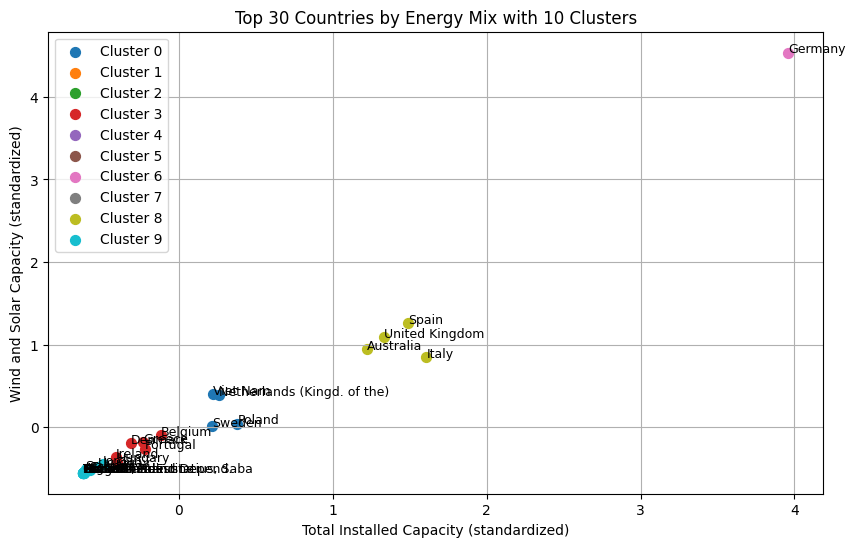

In [73]:
top_30_countries = merged_data.sort_values(by='Wind and Solar Percentage', ascending=False).head(30)

features_top_30 = top_30_countries[['Total Installed Capacity', 'Wind and Solar Capacity']]
features_top_30_scaled = scaler.fit_transform(features_top_30)
# Define a colormap for 10 clusters
colors = plt.cm.tab10(np.linspace(0, 1, 10))


# for 10 clusters
n_clusters = 10

# Generate a list of colors from a colormap
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

# Now, when plotting, use colors[i % n_clusters] to ensure the color index is within bounds
plt.figure(figsize=(10, 6))

for i in range(n_clusters):  # We have 10 clusters
    cluster_data = features_top_30_scaled[top_30_countries['Cluster'] == i]
    # Using colors[i % n_clusters] ensures we don't go out of bounds
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors[i % n_clusters], label=f'Cluster {i}')
    # Annotate country names
    countries_in_cluster = top_30_countries[top_30_countries['Cluster'] == i]['Country or Area'].values
    for j, country_name in enumerate(countries_in_cluster):
        # Ensure the index j is within the bounds of cluster_data for annotation
        if j < len(cluster_data):
            plt.text(cluster_data[j, 0], cluster_data[j, 1], country_name, fontsize=9)

plt.title('Top 30 Countries by Energy Mix with 10 Clusters')
plt.xlabel('Total Installed Capacity (standardized)')
plt.ylabel('Wind and Solar Capacity (standardized)')
plt.legend()
plt.grid(True)
plt.show()


# Appenix A2 -Flows

In [169]:

total_capacity_data_updated = pd.read_csv('total_capacity_full.csv')

# Filter for the UK data from 2011 to 2021
uk_data_updated = total_capacity_data_updated[(total_capacity_data_updated['Country or Area'] == 'United Kingdom') & (total_capacity_data_updated['Year'] >= 2011) & (total_capacity_data_updated['Year'] <= 2021)]


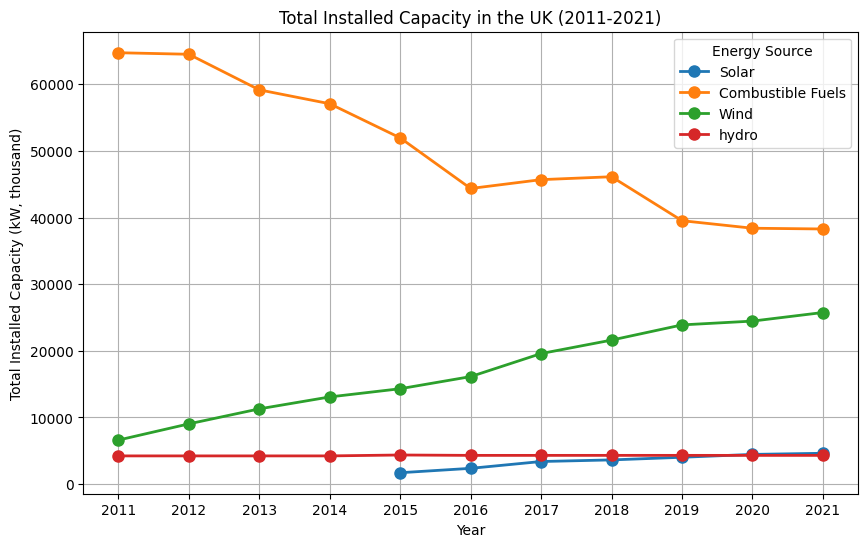

In [170]:

uk_total_capacity_trend = uk_data_updated.pivot(index='Year', columns='Commodity - Transaction', values='Quantity')

# Filtering for the relevant categories
uk_total_capacity_trend_filtered = uk_total_capacity_trend[[
    'Electricity - net installed capacity of electric power plants public solar',
    'Electricity - net installed capacity of electric power plants, public combustible fuels',
    'Electricity - total net installed capacity of electric power plants, wind',
    'Electricity - net installed capacity of electric power plants, public hydro'
]]

# Simplifying the labels for clarity in the plot
labels_simplified = ['Solar', 'Combustible Fuels', 'Wind','hydro']

plt.figure(figsize=(10, 6))

for category, label in zip(uk_total_capacity_trend_filtered.columns, labels_simplified):
    plt.plot(uk_total_capacity_trend_filtered.index, uk_total_capacity_trend_filtered[category], marker='o', linestyle='-', linewidth=2, markersize=8, label=label)

plt.title('Total Installed Capacity in the UK (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Total Installed Capacity (kW, thousand)')
plt.legend(title='Energy Source')
plt.grid(True)
plt.xticks(uk_total_capacity_trend_filtered.index)
plt.show()


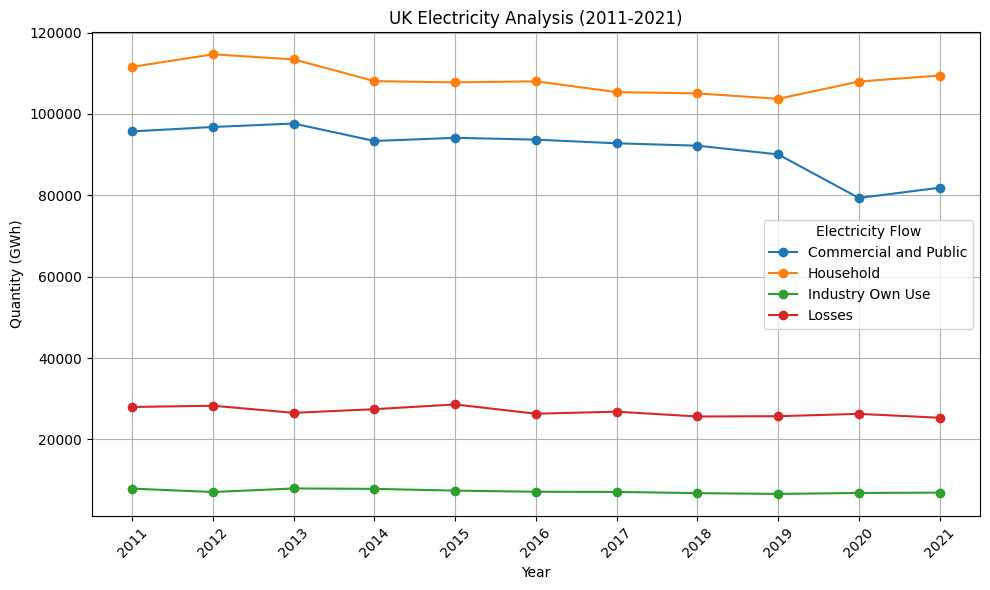

In [177]:

# Load the dataset
energy_data = pd.read_csv('energy_producers.csv')

# Filter the dataset for the years of interest
filtered_data = energy_data[energy_data['Year'].between(2011, 2021)]

# Define the areas of interest
areas_of_interest = [
    'Electricity - Consumption by households',
    'Electricity - Losses',
    'Electricity - Energy industries own use',
    'Electricity - Consumption by commercial and public services',
]

# Filter the data based on the areas of interest
filtered_data = filtered_data[filtered_data['Commodity - Transaction'].isin(areas_of_interest)]

# Group by year and area, then summarize the quantity
annual_summary = filtered_data.groupby(['Year', 'Commodity - Transaction'])['Quantity'].sum().unstack()

# Simplify the legend labels by mapping detailed descriptions to simpler names
legend_map = {
    'Electricity - Consumption by households': 'Household',
    'Electricity - Losses': 'Losses',
    'Electricity - Energy industries own use': 'Industry Own Use',
    'Electricity - Consumption by commercial and public services': 'Commercial and Public'
}

# Apply the mapping to the DataFrame columns
annual_summary.rename(columns=legend_map, inplace=True)

# Plotting the data
annual_summary.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('UK Electricity Analysis (2011-2021)')
plt.ylabel('Quantity (GWh)')  # Assuming Quantity is in Gigawatt hours
plt.xlabel('Year')
plt.xticks(annual_summary.index, rotation=45)
plt.legend(title='Electricity Flow')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
labels_simplified = ['Solar', 'Combustible Fuels', 'Wind','hydro']

plt.figure(figsize=(10, 6))

for category, label in zip(uk_total_capacity_trend_filtered.columns, labels_simplified):
    plt.plot(uk_total_capacity_trend_filtered.index, uk_total_capacity_trend_filtered[category], marker='o', linestyle='-', linewidth=2, markersize=8, label=label)

plt.title('Total Installed Capacity in the UK (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Total Installed Capacity (kW, thousand)')
plt.legend(title='Energy Source')
plt.grid(True)
plt.xticks(uk_total_capacity_trend_filtered.index)
plt.show()


# Appendix A4

In [ ]:
# Load the newly uploaded total capacity dataset for analysis

total_capacity_full_data = pd.read_csv('total_capacity_full.csv')

# Preliminary analysis to identify outliers, nulls, large variance, and potential biases

# Check for null values
null_counts = total_capacity_full_data.isnull().sum()

# Describe the dataset to understand variance and potential outliers
description = total_capacity_full_data.describe()

# Check for biases across regions by analyzing the distribution of data entries per region
region_distribution = total_capacity_full_data['Country or Area'].value_counts()

null_counts, description, region_distribution.head()


(Country or Area                0
 Commodity - Transaction        0
 Year                           2
 Unit                           2
 Quantity                       2
 Quantity Footnotes         54273
 dtype: int64,
                Year      Quantity  Quantity Footnotes
 count  71274.000000  7.127400e+04             17003.0
 mean    2007.181314  8.571122e+03                 1.0
 std        9.268187  5.604089e+04                 0.0
 min     1990.000000  0.000000e+00                 1.0
 25%     1999.000000  2.900000e+01                 1.0
 50%     2008.000000  2.830000e+02                 1.0
 75%     2015.000000  2.581000e+03                 1.0
 max     2022.000000  2.424060e+06                 1.0,
 United States    851
 Japan            754
 France           750
 Spain            722
 Germany          716
 Name: Country or Area, dtype: int64)